<a href="https://colab.research.google.com/github/marybaron/Intro-to-Machine-Learning/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 4 - Mary Baron

# 15.17 Binary Classification with the Breast Cancer Dataset:
Binary classification—two classes "malignant" or "benign"

# Load the Dataset 


In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer= load_breast_cancer()

# Check the Sample and Target Sizes


In [2]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
breast_cancer.target[::100] 

array([0, 0, 1, 0, 0, 1])

In [4]:
breast_cancer.data.shape

(569, 30)

In [5]:
breast_cancer.target.shape

(569,)

# Splitting the Data for Training and Testing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, random_state=11)

# Training and Testing Set Sizes


In [8]:
X_train.shape

(426, 30)

In [9]:
X_test.shape

(143, 30)

# Creating the Models


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
LogisticRegression = LogisticRegression()

# Training the Model - KNN



In [14]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

# Training the Model - Logistic Regression

In [15]:
LogisticRegression.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# Predicting - KNN



In [16]:
predicted = knn.predict(X=X_test)

In [17]:
expected = y_test

In [18]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [19]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

#Predicting - Logistic Regression

In [20]:
y_predicted = LogisticRegression.predict(X_test)

In [21]:
expected = y_test

In [22]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [23]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

# Estimator Method score


In [24]:
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


# Confusion Matrix


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [27]:
confusion

array([[43,  7],
       [ 1, 92]])

# Classification Report


# Visualizing the Confusion Matrix


In [28]:
import pandas as pd
import seaborn as sns

In [29]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

In [30]:
import matplotlib.pyplot as plt

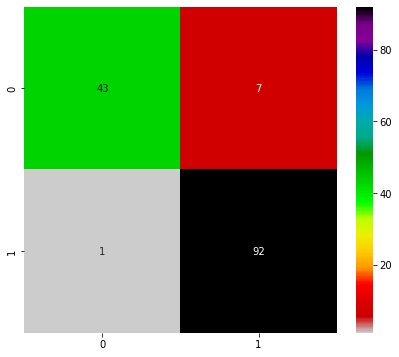

In [31]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r) 

# K-Fold Cross-Validation

In [32]:
from sklearn.model_selection import KFold    

In [33]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
scores = cross_val_score(estimator=knn, X=breast_cancer.data, 
          y=breast_cancer.target, cv=kfold)

In [36]:
scores

array([0.92982456, 0.94736842, 0.89473684, 0.92982456, 0.92982456,
       0.94736842, 0.89473684, 0.94736842, 0.94736842, 0.91071429])

In [37]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 92.79%


# Running Multiple Models to Find the Best One

In [38]:
from sklearn.svm import SVC

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
estimators = {
    'KNeighborsClassifier': knn,
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000), 
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

TypeError: ignored